In [1]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from matplotlib import rcParams
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset
import rsatoolbox.rdm as rsr
import os
import seaborn as sns
import sklearn as sk
import math
import pandas as pd
import pickle
import copy
import nibabel as nib
import re

In [2]:
# change the working directory to be the timecourse data
#os.chdir('/mnt/Data1/linjdata1/vswmda/scan_data/rsa/full_GLM_mgs_0.05_50/')
#os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_mgs_0.05_50/')
os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_atlas_roi/')

In [3]:
subjects = ['f09','f10','f11','f12','f15','f16','f17','f18','f19']
epochs = ['delay','response','stimulus']
exp1_subjects = ['f09','f10','f11','f12','f15','f16']
exp2_subjects = ['f17','f18','f19']

In [4]:
# get ROI name
# # if full_GLM_atlas_roi
order = ['area4-ju50',        
          'v1-wang25','v2-wang25',
          'ips0-wang15','ips1-wang15','ips2-wang15','ips3-wang15',
          'ips4-wang15','ips5-wang15','spl1-wang15','ips-wang15',
         'fef-wang25','spcs-md','ipcs-md','pmfg-md','amfg-md','ifg-md'
          ] 
         #'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp',


# for atlas_roi:
order_full = ['area4-ju50',        
          'v1-wang25','v2-wang25',
          'ips0-wang15','ips1-wang15','ips2-wang15','ips3-wang15',
          'ips4-wang15','ips5-wang15','spl1-wang15','ips-wang15',
         'fef-wang25','spcs-md','ipcs-md','pmfg-md','amfg-md','ifg-md',
              'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp'
          ] 
         #'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp',
    
    
# if full_GLM_mgs_xxx
# order = ['area4', 'v1', 'v2', 'ips', 'fef', 'sfg', 'mfg', 'ifg',
#          'ips0', 'ips1', 'ips2', 'ips3', 'ips4', 'ips5', 'spl1']
# for mgs roi:
# order_full = order

In [14]:
# change the following as needed
# roi_labels = {'area4': 'M1', 'v1': 'V1', 'v2': 'V2', 
              
#               'ips0': 'IPS0', 'ips1': 'IPS1', 'ips2': 'IPS2', 
#               'ips3': 'IPS3', 'ips4': 'IPS4', 'ips5': 'IPS5', 'spl1': 'SPL1',
              
#           'ips': 'IPS', 'fef': 'FEF', 'sfg': 'SFG', 
#           'mfg': 'MFG', 'ifg': 'IFG'}

# roi_labels = {'area4-ju50': 'M1-Julich', 'v1-wang25': 'V1-Wang25', 'v2-wang25': 'V2-Wang25', 
              
#               'ips0': 'IPS0', 'ips1': 'IPS1', 'ips2': 'IPS2', 
#               'ips3': 'IPS3', 'ips4': 'IPS4', 'ips5': 'IPS5', 
#               'spl1': 'SPL1',
              
#           'ips': 'IPS', 'fef-wang25': 'FEF-Wang25', 'spcs-md': 'sPCS-MD', 
#           'ipcs-md': 'iPCS-MD', 'amfg-md': 'aMFG-MD', 'pmfg-md': 'pMFG-MD','ifg-md': 'IFG-MD'}


roi_labels = {'area4-ju50': 'M1', 'v1-wang25': 'V1', 'v2-wang25': 'V2', 
              
              'ips0-wang15': 'IPS0', 'ips1-wang15': 'IPS1', 'ips2-wang15': 'IPS2', 
              'ips3-wang15': 'IPS3', 'ips4-wang15': 'IPS4', 'ips5-wang15': 'IPS5', 
              'spl1-wang15': 'SPL1',
              
          'ips-wang15': 'IPS', 'fef-wang25': 'FEF', 'spcs-md': 'sPCS', 
          'ipcs-md': 'iPCS', 'amfg-md': 'aMFG', 'pmfg-md': 'pMFG','ifg-md': 'IFG'}

# roi_order = list(roi_labels.values())
subj_labels = {index: subject for index, subject in enumerate(subjects, start=0)}
epoch_labels = {0: 'stimulus', 1: 'delay', 2: 'response'}

In [6]:
with open('rdm_crossnobis_split_by_sess_all.pkg','rb') as f:
    RDM = pickle.load(f)

In [15]:
dis_val_all = pd.DataFrame()
      
for rdm in RDM:
    subj = rdm.rdm_descriptors['subj']
    roi = rdm.rdm_descriptors['roi']
    session = rdm.rdm_descriptors['session']+1
    epoch = rdm.rdm_descriptors['epoch']
    conds = rdm.pattern_descriptors['conds']
    #print(subj,roi,session,epoch)


    a = rdm.get_matrices()[0]
    val = np.nanmean(a[np.where(~np.eye(a.shape[0],dtype=bool))])

#     # for L-R
#     labels = [x[-1] for x in conds]
#     rows_L = [i for i, label in enumerate(labels) if label == 'L']
#     cols_R = [i for i, label in enumerate(labels) if label == 'R']
#     val_LR = np.nanmean(a[np.ix_(rows_L, cols_R)])

#     # for W-T
#     labels = [x[-2] for x in conds]
#     rows_W = [i for i, label in enumerate(labels) if label == 'W']
#     cols_T = [i for i, label in enumerate(labels) if label == 'T']
#     val_WT = np.nanmean(a[np.ix_(rows_W, cols_T)])

#     # for ecc or CN
#     labels = [x[0] for x in conds]
#     rows_3_C = [i for i, label in enumerate(labels) if (label == '3') | (label == 'C')]
#     cols_5_N = [i for i, label in enumerate(labels) if (label == '5') | (label == 'N')]
#     val_ecc_or_CN = np.nanmean(a[np.ix_(rows_3_C, cols_5_N)])

    indices = np.array([[0, 2], [1, 3], [4, 6], [5, 7]])
    val_LR = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 1], [2, 3], [4, 5], [6, 7]])
    val_WT = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 4], [1, 5], [2, 6], [3, 7]])
    val_ecc = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 3], [1, 2], [4, 7], [5, 6]])
    val_LRWT = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 5], [1, 4], [2, 7], [3, 6]])
    val_eccWT = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 6], [1, 7], [2, 4], [3, 5]])
    val_eccLR = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 7], [1, 6], [2, 5], [3, 4]])
    val_all = np.nanmean([a[row, col] for row, col in indices]) 
    

    if subj[0] in exp1_subjects:
        df = pd.DataFrame({'rdm':[a],'data':[val],'data_LR':[val_LR],'data_WT':[val_WT],'data_ecc':[val_ecc],
                           'data_LRWT':[val_LRWT],'data_eccWT':[val_eccWT],'data_eccLR':[val_eccLR],'data_eccLRWT':[val_all],
                           'subj':subj,'roi':roi,'session':['Session '+str(session)],'epoch':[epoch]})
    else:
        df = pd.DataFrame({'rdm':[a],'data':[val],'data_LR':[val_LR],'data_WT':[val_WT],'data_CN':[val_ecc],
                            'data_LRWT':[val_LRWT],'data_CNWT':[val_eccWT],'data_CNLR':[val_eccLR],'data_CNLRWT':[val_all],
                           'subj':subj,'roi':roi,'session':['Session '+str(session)],'epoch':[epoch]})                
    dis_val_all = pd.concat([dis_val_all,df],axis=0)


/tmp/ipykernel_2284/983526267.py:13: RuntimeWarning: Mean of empty slice
  val = np.nanmean(a[np.where(~np.eye(a.shape[0],dtype=bool))])
/tmp/ipykernel_2284/983526267.py:34: RuntimeWarning: Mean of empty slice
  val_LR = np.nanmean([a[row, col] for row, col in indices])
/tmp/ipykernel_2284/983526267.py:37: RuntimeWarning: Mean of empty slice
  val_WT = np.nanmean([a[row, col] for row, col in indices])
/tmp/ipykernel_2284/983526267.py:40: RuntimeWarning: Mean of empty slice
  val_ecc = np.nanmean([a[row, col] for row, col in indices])
/tmp/ipykernel_2284/983526267.py:43: RuntimeWarning: Mean of empty slice
  val_LRWT = np.nanmean([a[row, col] for row, col in indices])
/tmp/ipykernel_2284/983526267.py:46: RuntimeWarning: Mean of empty slice
  val_eccWT = np.nanmean([a[row, col] for row, col in indices])
/tmp/ipykernel_2284/983526267.py:49: RuntimeWarning: Mean of empty slice
  val_eccLR = np.nanmean([a[row, col] for row, col in indices])
/tmp/ipykernel_2284/983526267.py:52: RuntimeWarnin

In [16]:
print(dis_val_all)

                                                  rdm      data   data_LR  \
0   [[0.0, -0.9625671907270866, -0.017911087878801...  0.144980 -0.367578   
0   [[0.0, 0.3893989903902995, 0.6421662144474842,... -0.128582 -1.063385   
0   [[0.0, -1.452618902700597, 1.0121536383810021,... -0.273145 -0.621271   
0   [[0.0, 0.8556501284906982, 0.2913574939882276,...  0.256217 -0.149066   
0   [[0.0, 1.4842180853328413, -0.2401073655840118...  0.289828 -0.310048   
..                                                ...       ...       ...   
0   [[0.0, 0.23646292570501395, -0.311723769812066...  0.140781  0.175008   
0   [[0.0, -0.052436473283121836, -0.1741575483884...  0.084724 -0.153978   
0   [[0.0, 0.0659021477418542, 0.09502194380267888...  0.154708  0.064824   
0   [[0.0, 0.050692312651401415, -0.14537019907348... -0.119007 -0.064371   
0   [[0.0, -0.10459504163401283, -0.53196204603165...  0.113465  0.064193   

     data_WT  data_ecc  data_LRWT  data_eccWT  data_eccLR  data_eccLRWT sub

In [17]:
dis_val_all['roi'] = dis_val_all['roi'].map(roi_labels)
dis_val_all.index = range(len(dis_val_all))

In [22]:
from matplotlib.patches import Patch
import warnings

def plot_group_dsm_star(dis_val_all, title, roi_labels, subj_labels, epoch_labels, data_column_name, 
                        session_palette, significance_df, sig_df1, aspect, ylim0, ylim1,h_offset):
    
    warnings.filterwarnings("ignore")
    roi_order = list(roi_labels.values())
    subj_order = list(subj_labels.values())

    # Define color-blind friendly palettes
    participant_palette = sns.color_palette("colorblind", dis_val_all['subj'].unique().shape[0])

    # Offset for the scatter points to align with the bar centers
    session_offsets = {'Session 1': -0.2, 'Session 2': 0.2}

    def scatter_and_lines(data, **kwargs):
        ax = plt.gca()

        # Plot scatter points
        for session, offset in session_offsets.items():
            subset = data[data['session'] == session]
            x_coords = [roi_order.index(roi) + offset for roi in subset['roi']]
            sns.scatterplot(x=x_coords, y=subset[data_column_name], hue=subset['subj'], palette=participant_palette, 
                            style=subset['session'], hue_order=subj_order, edgecolor='black', s=15, ax=ax, alpha=1, **kwargs)
            
        # Plot connecting lines
        for subj in subj_order:
            participant_data = data[data['subj'] == subj]
            if participant_data['session'].nunique() > 1:  # Check if data spans multiple sessions
                for roi in roi_order:
                    roi_data = participant_data[participant_data['roi'] == roi]
                    if roi_data.shape[0] > 1:  # Only plot lines if there are points in multiple sessions
                        x_coords = [roi_order.index(roi) + session_offsets[session] for session in roi_data['session']]
                        y_coords = [y for y in roi_data[data_column_name]]
                        participant_index = list(subj_labels.values()).index(subj)  # Use integer index to access the palette
                        ax.plot(x_coords, y_coords, color=participant_palette[participant_index], linewidth=2, linestyle='--', alpha=1)

    # Function to add significance stars
    def add_significance_stars(ax, current_epoch):
        # Filter the significance_df for the current epoch
        epoch_significance_df = significance_df[significance_df['epoch'] == current_epoch]

        for i, row in epoch_significance_df.iterrows():
            if row['p_value'] < 0.05:
                roi = row['roi']
                session = row['session']
                
                roi_idx = roi_order.index(roi)
                session_offset = session_offsets[session]
                x_coord = roi_idx + session_offset
                y_coord = dis_val_all[(dis_val_all['roi'] == roi) & 
                                      (dis_val_all['session'] == session) & 
                                      (dis_val_all['epoch'] == current_epoch)][data_column_name].max() + 0.1

                if row['p_value'] < 0.001:
                    stars = '***'
                elif row['p_value'] < 0.01:
                    stars = '**'
                else:
                    stars = '*'

                ax.annotate(stars, (x_coord, y_coord), textcoords="offset points", xytext=(0, 5), 
                            ha='center', fontsize=10, color='black')

    # Function to add between-session significance stars and horizontal lines
    def add_between_session_stars(ax, current_epoch):
        epoch_significance_df = sig_df1[sig_df1['epoch'] == current_epoch]

        for i, row in epoch_significance_df.iterrows():
            if row['p_value'] < 0.05:
                roi = row['roi']
                roi_idx = roi_order.index(roi)
                session1_offset = session_offsets['Session 1']
                session2_offset = session_offsets['Session 2']
                x_coord1 = roi_idx + session1_offset
                x_coord2 = roi_idx + session2_offset
                x_coord_mean = (x_coord1 + x_coord2) / 2
                y_coord = dis_val_all[(dis_val_all['roi'] == roi) & 
                                      (dis_val_all['epoch'] == current_epoch)][data_column_name].max() + 0.4

                if row['p_value'] < 0.001:
                    stars = '***'
                elif row['p_value'] < 0.01:
                    stars = '**'
                else:
                    stars = '*'

                ax.annotate(stars, (x_coord_mean, y_coord), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='black')
                ax.plot([x_coord1, x_coord2], [y_coord+h_offset, y_coord+h_offset], color='black', linewidth=1.5, linestyle='-')

    # Plotting
    task_epoch_order = ["stimulus", "delay"]
    plt.figure(figsize=(8, 16))  # Adjust size as needed
    g = sns.FacetGrid(dis_val_all, col="epoch", col_order=task_epoch_order, col_wrap=1, height=1.5, aspect=aspect)
    g.map_dataframe(sns.barplot, x='roi', y=data_column_name, hue='session', order=roi_order, errorbar=None, dodge=True, palette=session_palette, zorder=1)

    # Adjusting the labels and titles
    g.set_axis_labels(" ", " ")
    g.set_titles(col_template="", row_template="")

    # Adjusting the legend
    for ax in g.axes.flat:
        if ax.legend_:
            ax.legend_.remove()
        ax.axhline(0, color='black', linestyle='--', linewidth=2)

    # Manually create a legend
    handles, labels = [], []
    for participant, color in zip(subj_labels.values(), participant_palette):
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, alpha=1, markersize=10, label=participant))

    handles += [
        Patch(facecolor=session_palette[0], edgecolor='black', label='Session 1'),
        Patch(facecolor=session_palette[1], edgecolor='black', label='Session 2')
    ]

    g.map_dataframe(scatter_and_lines)

    # Add significance stars
    for ax, current_epoch in zip(g.axes.flat, task_epoch_order):
        plt.sca(ax)
        add_significance_stars(ax, current_epoch)
     #   add_between_session_stars(ax, current_epoch)

    # Adjusting font sizes for axes
    for ax in g.axes.flat:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)
        ax.set_title(ax.get_title(), fontsize=12)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_ylim(ylim0, ylim1)

    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.5)
    #plt.ylabel('Cross-nobis distance')
    
    plt.show()
    g.savefig(title, bbox_inches='tight', dpi=300)


In [23]:
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests

def ttest_crossnobis(df,colname):
    warnings.filterwarnings("ignore")
    # Assuming your dataframe is named dis_val_all

    # Define the df, epochs, and ROIs you want to analyze
    sessions = df['session'].unique()
    epochs = ['stimulus','delay'] #dis_val_all['epoch'].unique()
    rois = df['roi'].unique()

    results = []

    # Loop through each combination of session, epoch, and ROI
    for session in sessions:
        for epoch in epochs:
            for roi in rois:
                # Filter the dataframe
                filtered_df = df[(df['session'] == session) &
                                          (df['epoch'] == epoch) &
                                          (df['roi'] == roi)]

                # Extract the 'data' values
                data_values = filtered_df[colname].dropna()

                if len(data_values) > 0:
                    # Perform a one-sample t-test
                    t_stat, p_value = ttest_1samp(data_values, 0, alternative='greater')
                    dof = len(data_values)-1
                    
                    # Store the result
                    results.append({'session': session, 'epoch': epoch, 'roi': roi, 'mean': data_values.mean(), 
                                    't_stat': t_stat, 'p_value': p_value, 'dof': dof})

    # Convert results to a dataframe
    results_df = pd.DataFrame(results)
    
#     # Correct for multiple comparisons
#     p_values = results_df['p_value'].values.flatten()
#     corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
#     results_df['p_value'] = corrected_p_values.reshape(-1, 1)
    
    # Filter the results to only include rows with p_value less than 0.05
    significant_results_df = results_df[results_df['p_value'] < 0.05]

    # Define custom order for epochs
    epoch_order = ['stimulus', 'delay']

    # Convert 'epoch' column to a categorical type with the custom order
    significant_results_df['epoch'] = pd.Categorical(significant_results_df['epoch'], categories=epoch_order, ordered=True)

    # Sort by the custom epoch order
    significant_results_df = significant_results_df.sort_values(by=['session', 'epoch'])

    # Print the significant results
    return significant_results_df


In [24]:
from scipy.stats import ttest_rel
import pandas as pd
from statsmodels.stats.multitest import multipletests

def ttest_paired_sessions(dis_val_all, colname, session1, session2):
    warnings.filterwarnings("ignore")
    # Define the epochs and ROIs you want to analyze
    epochs = ['stimulus','delay'] #dis_val_all['epoch'].unique()
    rois = dis_val_all['roi'].unique()

    results = []

    # Loop through each combination of epoch and ROI
    for epoch in epochs:
        for roi in rois:
            # Filter the dataframe for each session
            df1 = dis_val_all[(dis_val_all['session'] == session1) &
                                        (dis_val_all['epoch'] == epoch) &
                                        (dis_val_all['roi'] == roi)]#[colname].dropna()

            df2 = dis_val_all[(dis_val_all['session'] == session2) &
                                        (dis_val_all['epoch'] == epoch) &
                                        (dis_val_all['roi'] == roi)]#[colname].dropna()

            
            # Identify common subject IDs
            common_subject_ids = set(df1['subj']).intersection(set(df2['subj']))

            # Filter dataframes to include only common subject IDs
            df1_filtered = df1[df1['subj'].isin(common_subject_ids)]
            df2_filtered = df2[df2['subj'].isin(common_subject_ids)]

            # Merge the filtered dataframes on 'subject_id'
            merged_df = pd.merge(df1_filtered, df2_filtered, on='subj', suffixes=('_df1', '_df2'))

            # Perform the paired t-test
            t_stat, p_value = ttest_rel(merged_df[colname+'_df1'], merged_df[colname+'_df2'])
            dof = len(merged_df[colname+'_df1'])-1
            
#             # Ensure that data lengths match for paired test
#             min_length = min(len(data_session1), len(data_session2))
#             if min_length > 0:
#                 # Perform a paired t-test
#                 t_stat, p_value, df, cint = ttest_rel(data_session1[:min_length], data_session2[:min_length])

            # Store the result
            results.append({'epoch': epoch, 'roi': roi, 'session1': session1, 'session2': session2, 
                            'session1-mean': merged_df[colname+'_df1'].mean(),
                            'session2-mean': merged_df[colname+'_df2'].mean(),
                            't_stat': t_stat, 'p_value': p_value,
                            'dof': dof})

    # Convert results to a dataframe
    results_df = pd.DataFrame(results)

#     # Correct for multiple comparisons
#     p_values = results_df['p_value'].values.flatten()
#     corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
#     results_df['p_value'] = corrected_p_values.reshape(-1, 1)
    
    # Filter the results to only include rows with p_value less than 0.05
    significant_results_df = results_df[results_df['p_value'] < 0.05]

    # Define custom order for epochs
    epoch_order = ['stimulus', 'delay']#, 'response']

    # Convert 'epoch' column to a categorical type with the custom order
    significant_results_df['epoch'] = pd.Categorical(significant_results_df['epoch'], categories=epoch_order, ordered=True)

    # Sort by the custom epoch order
    significant_results_df = significant_results_df.sort_values(by='epoch')

    # Print the significant results
    return results_df,significant_results_df


In [25]:
#session_palette = sns.color_palette("Blues",2)
session_palette= ['#D3D3D3', '#A9A9A9']

In [26]:
# selected_rois = ['M1-Julich','sPCS-MD','iPCS-MD','pMFG-MD','aMFG-MD','IFG-MD'] #'FEF-Wang25',
selected_rois = ['M1','sPCS','iPCS','pMFG','aMFG','IFG'] #'FEF-Wang25',
selected_rois_key = ['area4-ju50','spcs-md','ipcs-md','pmfg-md','amfg-md','ifg-md'] #'fef-wang25',
selected_epochs = ['stimulus','delay']
selected_epochs_key = [0,1]
df = dis_val_all[(dis_val_all['roi'].isin(selected_rois)) 
                  & (dis_val_all['epoch'].isin(selected_epochs))]

selected_roi_labels = {key: roi_labels[key] for key in selected_rois_key if key in roi_labels}
selected_epoch_labels = {key: epoch_labels[key] for key in selected_epochs_key if key in epoch_labels}

      session  epoch   roi      mean    t_stat   p_value  dof
20  Session 2  delay  iPCS  0.103141  2.153433  0.034133    7


<Figure size 800x1600 with 0 Axes>

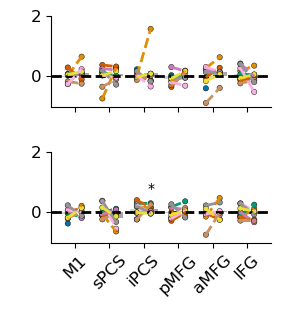

In [27]:
sig_df = ttest_crossnobis(df,'data_LR')
#results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
print(sig_df)
#print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_LR.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_LR',session_palette,sig_df,sig_df,2,-1,2,0.6)

     session  epoch   roi      mean    t_stat   p_value  dof
7  Session 1  delay  sPCS  0.158916  2.259087  0.026899    8


<Figure size 800x1600 with 0 Axes>

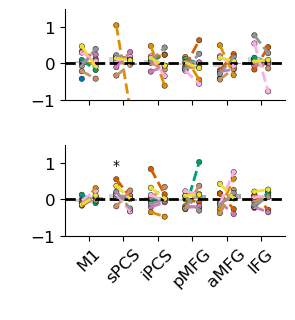

In [28]:
sig_df = ttest_crossnobis(df,'data_WT')
# results_df,sig_df1 = ttest_paired_sessions(df, 'data_WT', 'Session 1', 'Session 2')
print(sig_df)
# print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_WT.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_WT',session_palette,sig_df,sig_df,2,-1,1.5,0.6)

      session  epoch   roi      mean    t_stat   p_value  dof
20  Session 2  delay  iPCS  0.282679  5.667136  0.002391    4


<Figure size 800x1600 with 0 Axes>

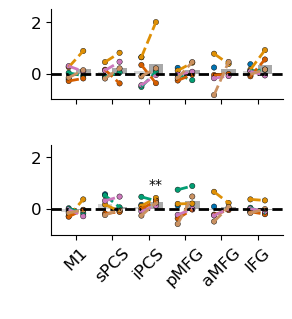

In [29]:
sig_df = ttest_crossnobis(df,'data_ecc')
# results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
print(sig_df)
# print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_ecc.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_ecc',session_palette,sig_df,sig_df,2,-1,2.5,0.6)

<Figure size 800x1600 with 0 Axes>

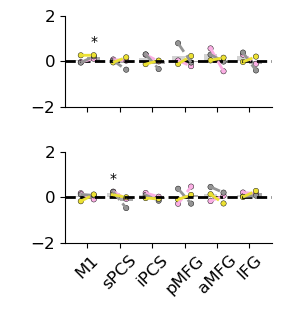

In [30]:
sig_df = ttest_crossnobis(df,'data_CN')
# results_df,sig_df1 = ttest_paired_sessions(df, 'data_CN', 'Session 1', 'Session 2')
# print(sig_df)
# print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_CN.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_CN',session_palette,sig_df,sig_df,2,-2,2,0.6)

In [31]:
# selected_rois = ['M1-Julich','IPS0-Wang15','IPS1-Wang15','IPS2-Wang15','SPL1-Wang15','IPS-Wang15'] #'IPS3','IPS4','IPS5',
selected_rois = ['M1','IPS0','IPS1','IPS2','SPL1','IPS'] #'IPS3','IPS4','IPS5',
selected_rois_key = ['area4-ju50','ips0-wang15','ips1-wang15','ips2-wang15','spl1-wang15','ips-wang15'] #'ips3','ips4','ips5',dpi=1200
selected_epochs = ['stimulus','delay']
selected_epochs_key = [0,1]
df = dis_val_all[(dis_val_all['roi'].isin(selected_rois)) 
                  & (dis_val_all['epoch'].isin(selected_epochs))]

selected_roi_labels = {key: roi_labels[key] for key in selected_rois_key if key in roi_labels}
selected_epoch_labels = {key: epoch_labels[key] for key in selected_epochs_key if key in epoch_labels}

In [32]:
print(df)

                                                   rdm      data   data_LR  \
0    [[0.0, -0.9625671907270866, -0.017911087878801...  0.144980 -0.367578   
3    [[0.0, 0.8556501284906982, 0.2913574939882276,...  0.256217 -0.149066   
4    [[0.0, 1.4842180853328413, -0.2401073655840118...  0.289828 -0.310048   
5    [[0.0, 1.3146106341689097, 0.4237487245739822,...  0.580986  0.003758   
9    [[0.0, -0.6322827991060548, -0.207879241796176...  0.041268 -0.084156   
..                                                 ...       ...       ...   
844  [[0.0, 0.5260428860404027, -0.5297812249563646...  0.061946  0.407030   
851  [[0.0, -0.40916049010768973, 0.718801807011251...  0.411761  0.463711   
852  [[0.0, 0.02288603443317508, -0.827968376931383... -0.039499  0.131324   
853  [[0.0, 0.8087745954740185, -0.1610869826772732...  0.454140  0.443290   
854  [[0.0, 0.5616625088426384, -0.4797528285333916...  0.179173  0.464643   

      data_WT  data_ecc  data_LRWT  data_eccWT  data_eccLR  dat

Empty DataFrame
Columns: [session, epoch, roi, mean, t_stat, p_value, dof]
Index: []
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

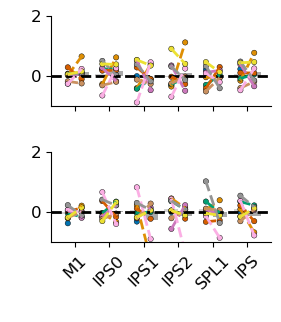

In [33]:
sig_df = ttest_crossnobis(df,'data_LR')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig2_parietal_LR.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_LR',session_palette,sig_df,sig_df1,2,-1,2,0.8)

      session     epoch   roi      mean    t_stat   p_value  dof
1   Session 1  stimulus  IPS0  0.308599  2.392237  0.021851    8
2   Session 1  stimulus  IPS1  0.339879  2.407554  0.021335    8
5   Session 1  stimulus   IPS  0.299645  2.229523  0.028169    8
22  Session 2     delay  SPL1  0.353145  2.825468  0.012786    7
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

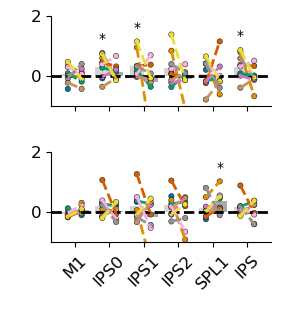

In [34]:
sig_df = ttest_crossnobis(df,'data_WT')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_WT', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig2_parietal_WT.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_WT',session_palette,sig_df,sig_df1,2,-1,2,0.8)

      session     epoch   roi      mean    t_stat   p_value  dof
1   Session 1  stimulus  IPS0  0.627725  2.138191  0.042756    5
19  Session 2     delay  IPS0  0.393764  7.324571  0.000924    4
20  Session 2     delay  IPS1  0.377541  2.254356  0.043612    4
21  Session 2     delay  IPS2  0.640177  2.744807  0.025825    4
22  Session 2     delay  SPL1  0.467016  2.964532  0.020684    4
23  Session 2     delay   IPS  0.470723  4.064842  0.007644    4
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

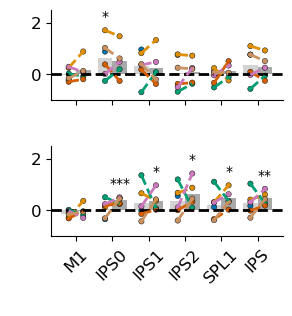

In [35]:
sig_df = ttest_crossnobis(df,'data_ecc')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig2_parietal_ecc.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_ecc',session_palette,sig_df,sig_df1,2,-1,2.5,0.8)

      session     epoch   roi      mean    t_stat   p_value  dof
4   Session 1  stimulus  SPL1  0.312295  4.123353  0.027044    2
12  Session 2  stimulus    M1  0.198037  4.351935  0.024478    2
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

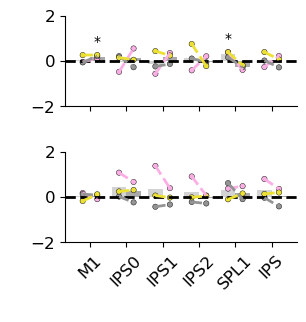

In [36]:
sig_df = ttest_crossnobis(df,'data_CN')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_CN', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig2_parietal_CN.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_CN',session_palette,sig_df,sig_df1,2,-2,2,0.8)

In [37]:
# selected_rois = ['M1-Julich','V1-Wang25','V2-Wang25']
selected_rois = ['M1','V1','V2']
selected_rois_key = ['area4-ju50','v1-wang25','v2-wang25']
selected_epochs = ['stimulus','delay']
selected_epochs_key = [0,1]
df = dis_val_all[(dis_val_all['roi'].isin(selected_rois)) 
                  & (dis_val_all['epoch'].isin(selected_epochs))]

selected_roi_labels = {key: roi_labels[key] for key in selected_rois_key if key in roi_labels}
selected_epoch_labels = {key: epoch_labels[key] for key in selected_epochs_key if key in epoch_labels}

     session     epoch roi      mean    t_stat   p_value  dof
7  Session 2  stimulus  V1  0.397493  2.218036  0.031028    7
8  Session 2  stimulus  V2  0.389956  2.118380  0.035947    7
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

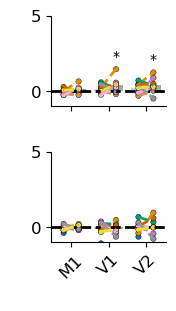

In [38]:
sig_df = ttest_crossnobis(df,'data_LR')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig1_visual_LR.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_LR',session_palette,sig_df,sig_df1,1.3,-1,5,0.85)

     session     epoch roi      mean    t_stat   p_value  dof
1  Session 1  stimulus  V1  0.885467  4.715745  0.000755    8
2  Session 1  stimulus  V2  1.214081  3.441379  0.004403    8
7  Session 2  stimulus  V1  0.852958  3.344338  0.006173    7
8  Session 2  stimulus  V2  1.512891  4.555114  0.001310    7
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

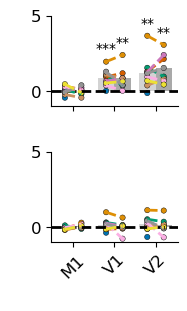

In [39]:
sig_df = ttest_crossnobis(df,'data_WT')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_WT', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig1_visual_WT.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_WT',session_palette,sig_df,sig_df1,1.3,-1,5,0.85)

     session     epoch roi      mean    t_stat   p_value  dof
1  Session 1  stimulus  V1  1.210241  4.847887  0.002341    5
2  Session 1  stimulus  V2  1.788552  8.879002  0.000151    5
7  Session 2  stimulus  V1  1.293561  5.118472  0.003447    4
8  Session 2  stimulus  V2  2.412933  6.816860  0.001210    4
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

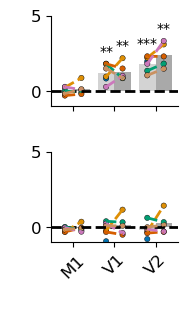

In [40]:
sig_df = ttest_crossnobis(df,'data_ecc')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig1_visual_ecc.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_ecc',session_palette,sig_df,sig_df1,1.3,-1,5,0.85)

     session     epoch roi      mean    t_stat   p_value  dof
6  Session 2  stimulus  M1  0.198037  4.351935  0.024478    2
Empty DataFrame
Columns: [epoch, roi, session1, session2, session1-mean, session2-mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

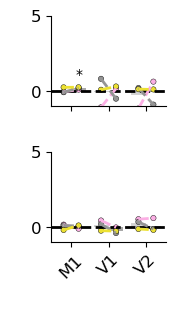

In [41]:
sig_df = ttest_crossnobis(df,'data_CN')
results_df,sig_df1 = ttest_paired_sessions(df, 'data_CN', 'Session 1', 'Session 2')
print(sig_df)
print(sig_df1)

plot_group_dsm_star(df,'Fig1_visual_CN.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_CN',session_palette,sig_df,sig_df1,1.3,-1,5,0.85)